In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

Train, test and validation arrays normalized to:
[1.], [0.9996], [1.002]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (114056, 1, 32) 
Labels shape:  (114056,) 
Shape of test set: (11406, 1, 32) 
Shape of train set: (91244, 1, 32) 
Shape of validation set: (11406, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.22, 0.18, 0.21, 0.22, 0.17] 
Fraction of train labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32


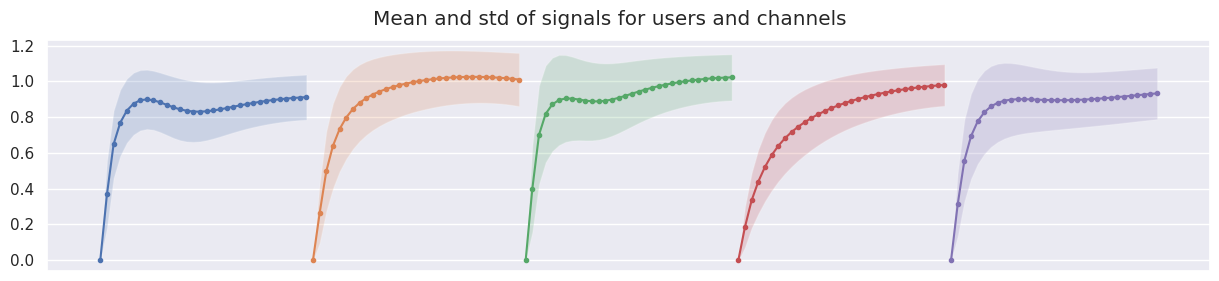

In [1]:
# Standard example 
from peratouch.data import Data 
from peratouch.trainer import Trainer 
from peratouch.results import Results 
from peratouch.networks import CNN
from peratouch.config import datapath_five_users

D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
# D.balance_train()
D.normalize()
D.tensors_to_device()
D.print_shapes()
D.plot_data()

End of epoch 1: loss_tr=1.089, loss_val=1.076, train=58.1%, val=58.7%
End of epoch 3: loss_tr=0.949, loss_val=0.933, train=63.6%, val=64.1%
End of epoch 5: loss_tr=0.903, loss_val=0.892, train=65.5%, val=65.5%
End of epoch 7: loss_tr=0.876, loss_val=0.863, train=66.3%, val=66.4%
End of epoch 9: loss_tr=0.860, loss_val=0.854, train=67.0%, val=66.7%
End of epoch 11: loss_tr=0.844, loss_val=0.833, train=67.5%, val=67.6%
End of epoch 13: loss_tr=0.846, loss_val=0.838, train=67.2%, val=67.6%
End of epoch 15: loss_tr=0.840, loss_val=0.835, train=67.4%, val=67.2%
End of epoch 17: loss_tr=0.826, loss_val=0.819, train=68.1%, val=68.6%
End of epoch 19: loss_tr=0.825, loss_val=0.820, train=68.2%, val=68.5%

Training Complete!
Loading best weights for lowest validation loss=0.819 ...

Average running time per epoch: 1.00 seconds
Total running time: 19.09 seconds

Test dataset metrics:
Overall Accuracy = 68.6%, Matthews Corr Coef = 0.61


              precision    recall  f1-score   support

     

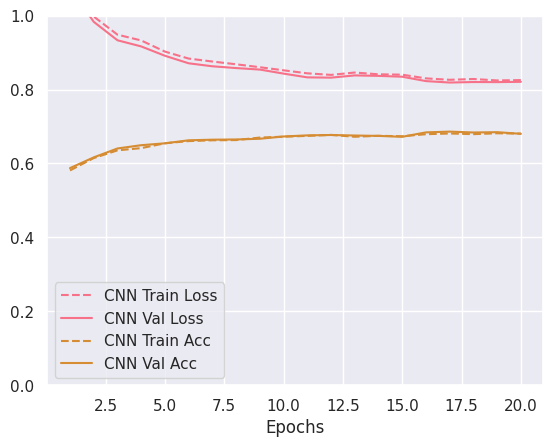

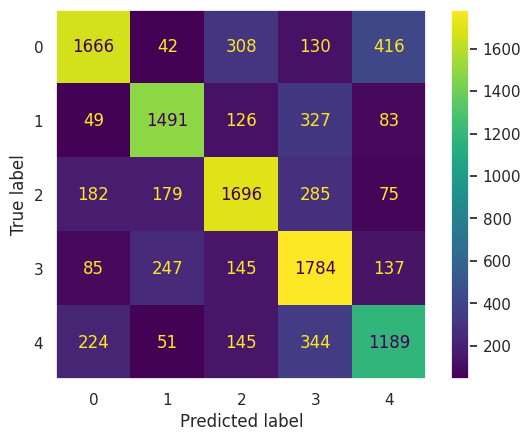

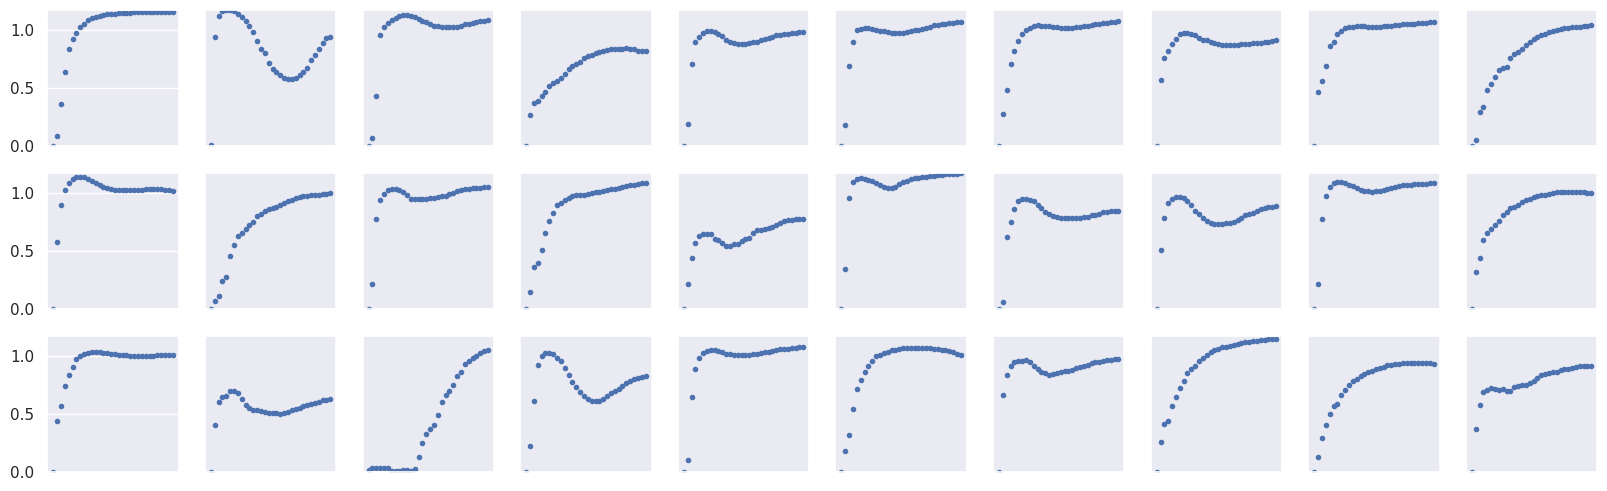

In [6]:
model = CNN(input_ch=1, n_filters=4, n_hidden=128, out_size=5)
T = Trainer(D)
T.setup(model, max_epochs=20, batch_size=5000)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

In [8]:
# Look at 3 channels
from peratouch.data import Data 
from peratouch.trainer import Trainer  
from peratouch.networks import CNN 
from peratouch.config import datapath_five_users
D = Data(datapath_five_users, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation arrays normalized to:
[1. 1. 1.], [0.9991 1.0002 1.0004], [1.0019 1.0013 1.0018]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (114041, 3, 32) 
Labels shape:  (114041,) 
Shape of test set: (11404, 3, 32) 
Shape of train set: (91232, 3, 32) 
Shape of validation set: (11405, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32


End of epoch 1: loss_tr=1.054, loss_val=1.056, train=58.1%, val=58.6%
End of epoch 3: loss_tr=0.829, loss_val=0.830, train=68.7%, val=68.4%
End of epoch 5: loss_tr=0.767, loss_val=0.766, train=70.9%, val=71.1%
End of epoch 7: loss_tr=0.730, loss_val=0.731, train=72.3%, val=72.4%
End of epoch 9: loss_tr=0.693, loss_val=0.696, train=73.6%, val=73.7%
End of epoch 11: loss_tr=0.682, loss_val=0.688, train=73.7%, val=73.7%
End of epoch 13: loss_tr=0.656, loss_val=0.661, train=74.8%, val=74.8%
End of epoch 15: loss_tr=0.664, loss_val=0.667, train=74.3%, val=74.4%
End of epoch 17: loss_tr=0.632, loss_val=0.642, train=75.8%, val=75.4%
End of epoch 19: loss_tr=0.623, loss_val=0.629, train=75.9%, val=75.4%

Training Complete!
Loading best weights for lowest validation loss=0.629 ...

Average running time per epoch: 1.91 seconds
Total running time: 36.28 seconds

Test dataset metrics:
Overall Accuracy = 75.7%, Matthews Corr Coef = 0.70


              precision    recall  f1-score   support

     

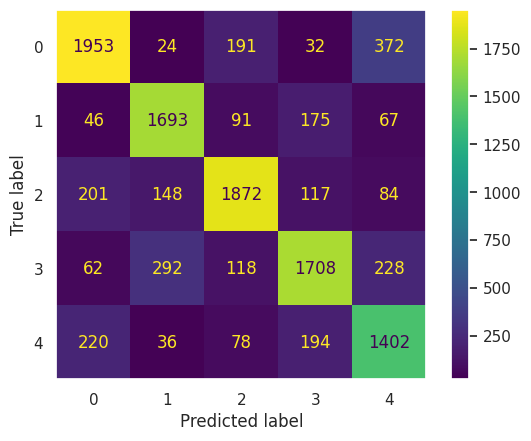

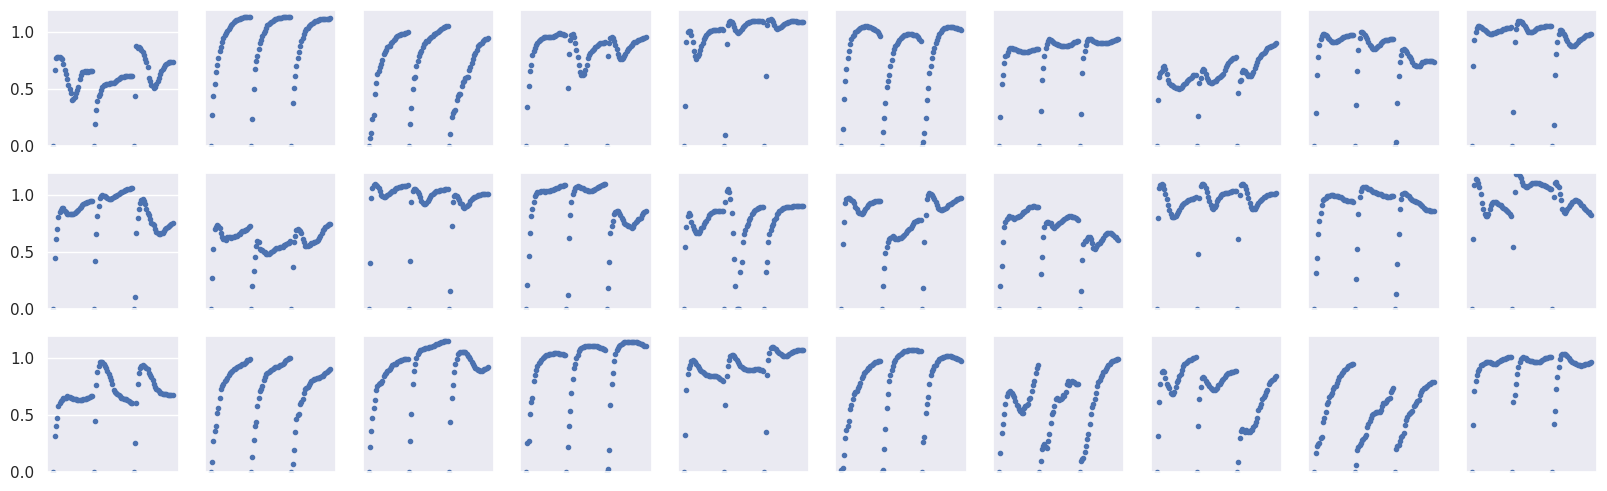

In [9]:
# Did not see any improvement by trying out CNN_Dense
model = CNN(input_ch=3, n_filters=8, n_hidden=256, out_size=5) 
T = Trainer(D) 
T.setup(model,learning_rate=1e-2, weight_decay=1e-3, max_epochs=20, batch_size=5000)
T.train_model(model)

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

In [1]:
# TODO: To look at some simple transforms, set transforms=True
# TODO: Look at longer windows of data, maybe width=64